In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
repertoire_types = ['T_cell_rich_monoclonal','T_cell_rich_polyclonal','T_cell_poor_polyclonal']

## MIXCR

MIXCR - 150bp

In [3]:
columns = ['th', 'observed_portion_frequency_150bp', 'class']
MIXCR_150bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_MIXCR_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_150bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    MIXCR_150bp = pd.concat([MIXCR_150bp, df_temp_aa], ignore_index=True, sort=False)
    MIXCR_150bp['tool'] = 'MIXCR'

MIXCR - 75bp

In [4]:
columns = ['th', 'observed_portion_frequency_75bp', 'class']
MIXCR_75bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/75bp/capturing_per_class/capturing_MIXCR_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_75bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    MIXCR_75bp = pd.concat([MIXCR_75bp, df_temp_aa], ignore_index=True, sort=False)
    MIXCR_75bp['tool'] = 'MIXCR'

MIXCR - 50bp

In [5]:
columns = ['th', 'observed_portion_frequency_50bp', 'class']
MIXCR_50bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/50bp/capturing_per_class/capturing_MIXCR_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_50bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    MIXCR_50bp = pd.concat([MIXCR_50bp, df_temp_aa], ignore_index=True, sort=False)
    MIXCR_50bp['tool'] = 'MIXCR'

In [6]:
df_MIXCR = pd.merge(MIXCR_150bp, MIXCR_75bp, how='left', on=['th','class','tool'])
df_MIXCR = pd.merge(df_MIXCR, MIXCR_50bp, how='left', on=['th','class','tool'])
df_MIXCR['tool'] = 'MIXCR'

df_MIXCR

,th,observed_portion_frequency_150bp,class,tool,observed_portion_frequency_75bp,observed_portion_frequency_50bp
0,0.000000,0.928713,T_cell_rich_monoclonal,MIXCR,0.925325,0.922159
1,0.000010,0.943874,T_cell_rich_monoclonal,MIXCR,0.940515,0.937387
2,0.000020,0.946668,T_cell_rich_monoclonal,MIXCR,0.943454,0.940376
3,0.000030,0.979478,T_cell_rich_monoclonal,MIXCR,0.977040,0.974522
4,0.000040,0.989179,T_cell_rich_monoclonal,MIXCR,0.987242,0.985006
...,...,...,...,...,...,...
167668,0.720347,1.000000,T_cell_poor_polyclonal,MIXCR,1.000000,1.000000
167669,0.720357,1.000000,T_cell_poor_polyclonal,MIXCR,1.000000,1.000000
167670,0.720367,1.000000,T_cell_poor_polyclonal,MIXCR,1.000000,1.000000
167671,0.720377,1.000000,T_cell_poor_polyclonal,MIXCR,1.000000,1.000000


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


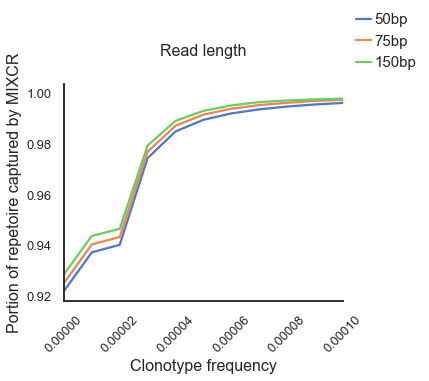

In [7]:
sns.set_style("white") 
sns.set_context("talk")  
    
figure = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_monoclonal']
    
fig, ax = plt.subplots(figsize=(5, 4))

sns.lineplot(figure['th'],figure['observed_portion_frequency_50bp'],label='50bp',color='#4878d0')
sns.lineplot(figure['th'],figure['observed_portion_frequency_75bp'],label='75bp',color='#ee854a')
sns.lineplot(figure['th'],figure['observed_portion_frequency_150bp'],label='150bp',color='#6acc64')
    
ax.legend(['50bp','75bp','150bp'])
  
plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
locs, labels = plt.xticks()
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency')
plt.title('Read length',y=1.1,fontsize=16)
ax.set_xlim(0,0.0001)
   
# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=45)
sns.despine()
plt.subplots_adjust(wspace=0.5)

plt.savefig("../figures/supplementary/figureS5_a1.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_a1.png",bbox_inches="tight")
plt.show(block=False)

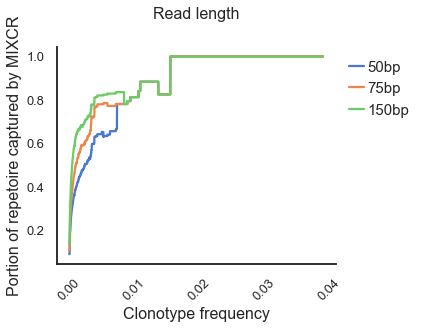

In [9]:
sns.set_style("white") 
sns.set_context("talk")  
    
figure = df_MIXCR.loc[df_MIXCR['class'] == 'T_cell_rich_polyclonal']
    
fig, ax = plt.subplots(figsize=(5, 4))

sns.lineplot(figure['th'],figure['observed_portion_frequency_50bp'],label='50bp',color='#4878d0')
sns.lineplot(figure['th'],figure['observed_portion_frequency_75bp'],label='75bp',color='#ee854a')
sns.lineplot(figure['th'],figure['observed_portion_frequency_150bp'],label='150bp',color='#6acc64')
    
ax.legend(['50bp','75bp','150bp'])
  
plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
locs, labels = plt.xticks()
ax.set_ylabel('Portion of repetoire captured by MIXCR')
ax.set_xlabel('Clonotype frequency')
plt.title('Read length',y=1.1,fontsize=16)
   
# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=45)
sns.despine()
plt.subplots_adjust(wspace=0.5)

plt.savefig("../figures/supplementary/figureS5_b1.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_b1.png",bbox_inches="tight")
plt.show(block=False)

## IMREP

IMREP - 150bp

In [10]:
columns = ['th', 'observed_portion_frequency_150bp', 'class']
IMREP_150bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_IMREP_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_150bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    IMREP_150bp = pd.concat([IMREP_150bp, df_temp_aa], ignore_index=True, sort=False)
    IMREP_150bp['tool'] = 'IMREP'

IMREP - 75bp

In [11]:
columns = ['th', 'observed_portion_frequency_75bp', 'class']
IMREP_75bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/75bp/capturing_per_class/capturing_IMREP_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_75bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    IMREP_75bp = pd.concat([IMREP_75bp, df_temp_aa], ignore_index=True, sort=False)
    IMREP_75bp['tool'] = 'IMREP'

IMREP - 50bp

In [12]:
columns = ['th', 'observed_portion_frequency_50bp', 'class']
IMREP_50bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/50bp/capturing_per_class/capturing_IMREP_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_50bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    IMREP_50bp = pd.concat([IMREP_50bp, df_temp_aa], ignore_index=True, sort=False)
    IMREP_50bp['tool'] = 'IMREP'

In [13]:
df_IMREP = pd.merge(IMREP_150bp, IMREP_75bp, how='left', on=['th','class','tool'])
df_IMREP = pd.merge(df_IMREP, IMREP_50bp, how='left', on=['th','class','tool'])
df_IMREP['tool'] = 'IMREP'

df_IMREP

,th,observed_portion_frequency_150bp,class,tool,observed_portion_frequency_75bp,observed_portion_frequency_50bp
0,0.000000,0.932202,T_cell_rich_monoclonal,IMREP,0.927325,0.918173
1,0.000010,0.946978,T_cell_rich_monoclonal,IMREP,0.942285,0.933285
2,0.000020,0.949521,T_cell_rich_monoclonal,IMREP,0.945125,0.936301
3,0.000030,0.980980,T_cell_rich_monoclonal,IMREP,0.977759,0.970461
4,0.000040,0.990223,T_cell_rich_monoclonal,IMREP,0.987683,0.981118
...,...,...,...,...,...,...
167668,0.720347,1.000000,T_cell_poor_polyclonal,IMREP,NaN,NaN
167669,0.720357,1.000000,T_cell_poor_polyclonal,IMREP,NaN,NaN
167670,0.720367,1.000000,T_cell_poor_polyclonal,IMREP,NaN,NaN
167671,0.720377,1.000000,T_cell_poor_polyclonal,IMREP,NaN,NaN


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


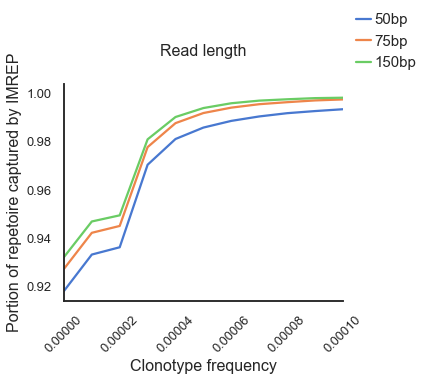

In [14]:
sns.set_style("white") 
sns.set_context("talk")  
    
figure = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_monoclonal']
    
fig, ax = plt.subplots(figsize=(5, 4))

sns.lineplot(figure['th'],figure['observed_portion_frequency_50bp'],label='50bp',color='#4878d0')
sns.lineplot(figure['th'],figure['observed_portion_frequency_75bp'],label='75bp',color='#ee854a')
sns.lineplot(figure['th'],figure['observed_portion_frequency_150bp'],label='150bp',color='#6acc64')
    
ax.legend(['50bp','75bp','150bp'])
  
plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
locs, labels = plt.xticks()
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency')
plt.title('Read length',y=1.1,fontsize=16)
ax.set_xlim(0,0.0001)
   
# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=45)
sns.despine()
plt.subplots_adjust(wspace=0.5)

plt.savefig("../figures/supplementary/figureS5_a2.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_a2.png",bbox_inches="tight")
plt.show(block=False)

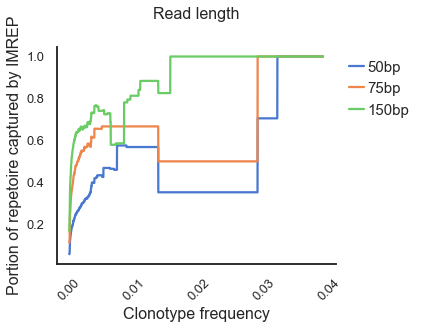

In [15]:
sns.set_style("white") 
sns.set_context("talk")  
    
figure = df_IMREP.loc[df_IMREP['class'] == 'T_cell_rich_polyclonal']
    
fig, ax = plt.subplots(figsize=(5, 4))

sns.lineplot(figure['th'],figure['observed_portion_frequency_50bp'],label='50bp',color='#4878d0')
sns.lineplot(figure['th'],figure['observed_portion_frequency_75bp'],label='75bp',color='#ee854a')
sns.lineplot(figure['th'],figure['observed_portion_frequency_150bp'],label='150bp',color='#6acc64')
    
ax.legend(['50bp','75bp','150bp'])
  
plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
locs, labels = plt.xticks()
ax.set_ylabel('Portion of repetoire captured by IMREP')
ax.set_xlabel('Clonotype frequency')
plt.title('Read length',y=1.1,fontsize=16)
   
# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=45)
sns.despine()
plt.subplots_adjust(wspace=0.5)

plt.savefig("../figures/supplementary/figureS5_b2.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_b2.png",bbox_inches="tight")
plt.show(block=False)

## TRUST4

TRUST4 - 150bp

In [16]:
columns = ['th', 'observed_portion_frequency_150bp', 'class']
TRUST4_150bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/original/capturing_per_class/capturing_TRUST4_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_150bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    TRUST4_150bp = pd.concat([TRUST4_150bp, df_temp_aa], ignore_index=True, sort=False)
    TRUST4_150bp['tool'] = 'TRUST4'

TRUST4 - 75bp

In [17]:
columns = ['th', 'observed_portion_frequency_75bp', 'class']
TRUST4_75bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/75bp/capturing_per_class/capturing_TRUST4_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_75bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    TRUST4_75bp = pd.concat([TRUST4_75bp, df_temp_aa], ignore_index=True, sort=False)
    TRUST4_75bp['tool'] = 'TRUST4'

TRUST4 - 50bp

In [18]:
columns = ['th', 'observed_portion_frequency_50bp', 'class']
TRUST4_50bp = pd.DataFrame(columns=columns)

for repertoire in repertoire_types: 
    df_temp_aa = pd.read_csv('../summary_data/50bp/capturing_per_class/capturing_TRUST4_'+repertoire+'.csv')
    df_temp_aa = df_temp_aa[df_temp_aa['observed_portion_frequency'].notna()]
    df_temp_aa = df_temp_aa[df_temp_aa.observed_portion_frequency != 0]
    df_temp_aa.rename(columns={'observed_portion_frequency':'observed_portion_frequency_50bp'}, inplace=True)

    df_temp_aa['class'] = repertoire

    TRUST4_50bp = pd.concat([TRUST4_50bp, df_temp_aa], ignore_index=True, sort=False)
    TRUST4_50bp['tool'] = 'TRUST4'

In [19]:
df_TRUST4 = pd.merge(TRUST4_150bp, TRUST4_75bp, how='left', on=['th','class','tool'])
df_TRUST4 = pd.merge(df_TRUST4, TRUST4_50bp, how='left', on=['th','class','tool'])
df_TRUST4['tool'] = 'TRUST4'

df_TRUST4

,th,observed_portion_frequency_150bp,class,tool,observed_portion_frequency_75bp,observed_portion_frequency_50bp
0,0.000000,0.934391,T_cell_rich_monoclonal,TRUST4,0.924725,0.917835
1,0.000010,0.949144,T_cell_rich_monoclonal,TRUST4,0.939966,0.933074
2,0.000020,0.951647,T_cell_rich_monoclonal,TRUST4,0.942985,0.936134
3,0.000030,0.982573,T_cell_rich_monoclonal,TRUST4,0.976455,0.970539
4,0.000040,0.991436,T_cell_rich_monoclonal,TRUST4,0.986641,0.981378
...,...,...,...,...,...,...
167668,0.720347,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN
167669,0.720357,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN
167670,0.720367,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN
167671,0.720377,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN


/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/Users/keruipeng/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


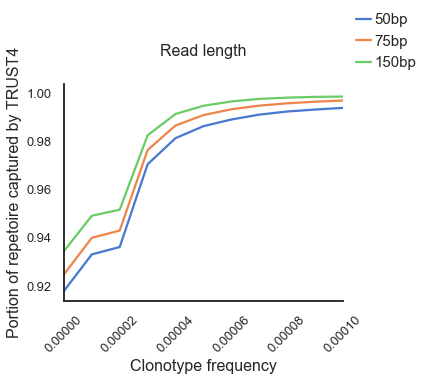

In [20]:
sns.set_style("white") 
sns.set_context("talk")  
    
figure = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_monoclonal']
    
fig, ax = plt.subplots(figsize=(5, 4))

sns.lineplot(figure['th'],figure['observed_portion_frequency_50bp'],label='50bp',color='#4878d0')
sns.lineplot(figure['th'],figure['observed_portion_frequency_75bp'],label='75bp',color='#ee854a')
sns.lineplot(figure['th'],figure['observed_portion_frequency_150bp'],label='150bp',color='#6acc64')
    
ax.legend(['50bp','75bp','150bp'])
  
plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
locs, labels = plt.xticks()
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency')
plt.title('Read length',y=1.1,fontsize=16)
ax.set_xlim(0,0.0001)
   
# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=45)
sns.despine()
plt.subplots_adjust(wspace=0.5)

plt.savefig("../figures/supplementary/figureS5_a3.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_a3.png",bbox_inches="tight")
plt.show(block=False)

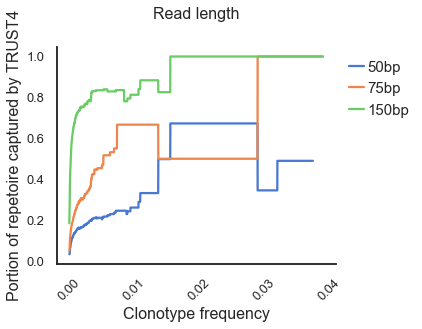

In [21]:
sns.set_style("white") 
sns.set_context("talk")  
    
figure = df_TRUST4.loc[df_TRUST4['class'] == 'T_cell_rich_polyclonal']
    
fig, ax = plt.subplots(figsize=(5, 4))

sns.lineplot(figure['th'],figure['observed_portion_frequency_50bp'],label='50bp',color='#4878d0')
sns.lineplot(figure['th'],figure['observed_portion_frequency_75bp'],label='75bp',color='#ee854a')
sns.lineplot(figure['th'],figure['observed_portion_frequency_150bp'],label='150bp',color='#6acc64')
    
ax.legend(['50bp','75bp','150bp'])
  
plt.legend(bbox_to_anchor=(1,1), frameon=False, ncol=1, handletextpad=0.2, columnspacing=0.8, handlelength=1, prop={'size': 15})
locs, labels = plt.xticks()
ax.set_ylabel('Portion of repetoire captured by TRUST4')
ax.set_xlabel('Clonotype frequency')
plt.title('Read length',y=1.1,fontsize=16)

# setting label sizes after creation
ax.xaxis.label.set_size(16)
ax.yaxis.label.set_size(16)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.tick_params(axis='both', which='minor', labelsize=13)
plt.xticks(rotation=45)
sns.despine()
plt.subplots_adjust(wspace=0.5)

plt.savefig("../figures/supplementary/figureS5_b3.pdf",bbox_inches="tight")
plt.savefig("../figures/supplementary/figureS5_b3.png",bbox_inches="tight")
plt.show(block=False)

In [22]:
df_combined = pd.concat([df_MIXCR,df_IMREP,df_TRUST4], ignore_index=True, sort=False)
df_combined

,th,observed_portion_frequency_150bp,class,tool,observed_portion_frequency_75bp,observed_portion_frequency_50bp
0,0.000000,0.928713,T_cell_rich_monoclonal,MIXCR,0.925325,0.922159
1,0.000010,0.943874,T_cell_rich_monoclonal,MIXCR,0.940515,0.937387
2,0.000020,0.946668,T_cell_rich_monoclonal,MIXCR,0.943454,0.940376
3,0.000030,0.979478,T_cell_rich_monoclonal,MIXCR,0.977040,0.974522
4,0.000040,0.989179,T_cell_rich_monoclonal,MIXCR,0.987242,0.985006
...,...,...,...,...,...,...
503014,0.720347,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN
503015,0.720357,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN
503016,0.720367,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN
503017,0.720377,1.000000,T_cell_poor_polyclonal,TRUST4,1.000000,NaN


In [23]:
portion = df_combined.loc[df_combined['th'] == 0]
mean_portion = portion.groupby(["tool","class"])["observed_portion_frequency_150bp","observed_portion_frequency_75bp","observed_portion_frequency_50bp"].agg(["mean"]) 
display(mean_portion)

observed_portion_frequency_150bp  \
                                                          mean   
tool   class                                                     
IMREP  T_cell_poor_polyclonal                         0.183219   
       T_cell_rich_monoclonal                         0.932202   
       T_cell_rich_polyclonal                         0.165570   
MIXCR  T_cell_poor_polyclonal                         0.119798   
       T_cell_rich_monoclonal                         0.928713   
       T_cell_rich_polyclonal                         0.130544   
TRUST4 T_cell_poor_polyclonal                         0.240798   
       T_cell_rich_monoclonal                         0.934391   
       T_cell_rich_polyclonal                         0.184325   

                              observed_portion_frequency_75bp  \
                                                         mean   
tool   class                                                    
IMREP  T_cell_poor_polyclonal                        0.018644   
       T_cell_rich_monoclonal                        0.927325   
       T_cell_rich_polyclonal                        0.112041   
MIXCR  T_cell_poor_polyclonal                        0.122619   
       T_cell_rich_monoclonal                        0.925325   
       T_cell_rich_polyclonal                        0.105645   
TRUST4 T_cell_poor_polyclonal                        0.087632   
       T_cell_rich_monoclonal                        0.924725   
       T_cell_rich_polyclonal                        0.051032   

                              observed_portion_frequency_50bp  
                                                         mean  
tool   class                                                   
IMREP  T_cell_poor_polyclonal                             NaN  
       T_cell_rich_monoclonal                        0.918173  
       T_cell_rich_polyclonal                        0.057463  
MIXCR  T_cell_poor_polyclonal                        0.116157  
       T_cell_rich_monoclonal                        0.922159  
       T_cell_rich_polyclonal                        0.089097  
TRUST4 T_cell_poor_polyclonal                        0.014777  
       T_cell_rich_monoclonal                        0.917835  
       T_cell_rich_polyclonal                        0.033412